In [71]:
import pickle
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from imblearn.over_sampling import SMOTE, SMOTENC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

In [72]:
Data= pd.read_csv(r"C:\Users\HP\Downloads\cover_type (1).csv")

In [73]:
data=pd.DataFrame(Data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           145890 non-null  int64  
 1   Aspect                              145890 non-null  int64  
 2   Slope                               145890 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    145890 non-null  int64  
 4   Vertical_Distance_To_Hydrology      145890 non-null  int64  
 5   Horizontal_Distance_To_Roadways     145890 non-null  int64  
 6   Hillshade_9am                       145890 non-null  int64  
 7   Hillshade_Noon                      145890 non-null  int64  
 8   Hillshade_3pm                       145890 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  int64  
 10  Wilderness_Area_1                   145890 non-null  float64
 11  Wilderness_Area_2         

In [74]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen


## Outliers

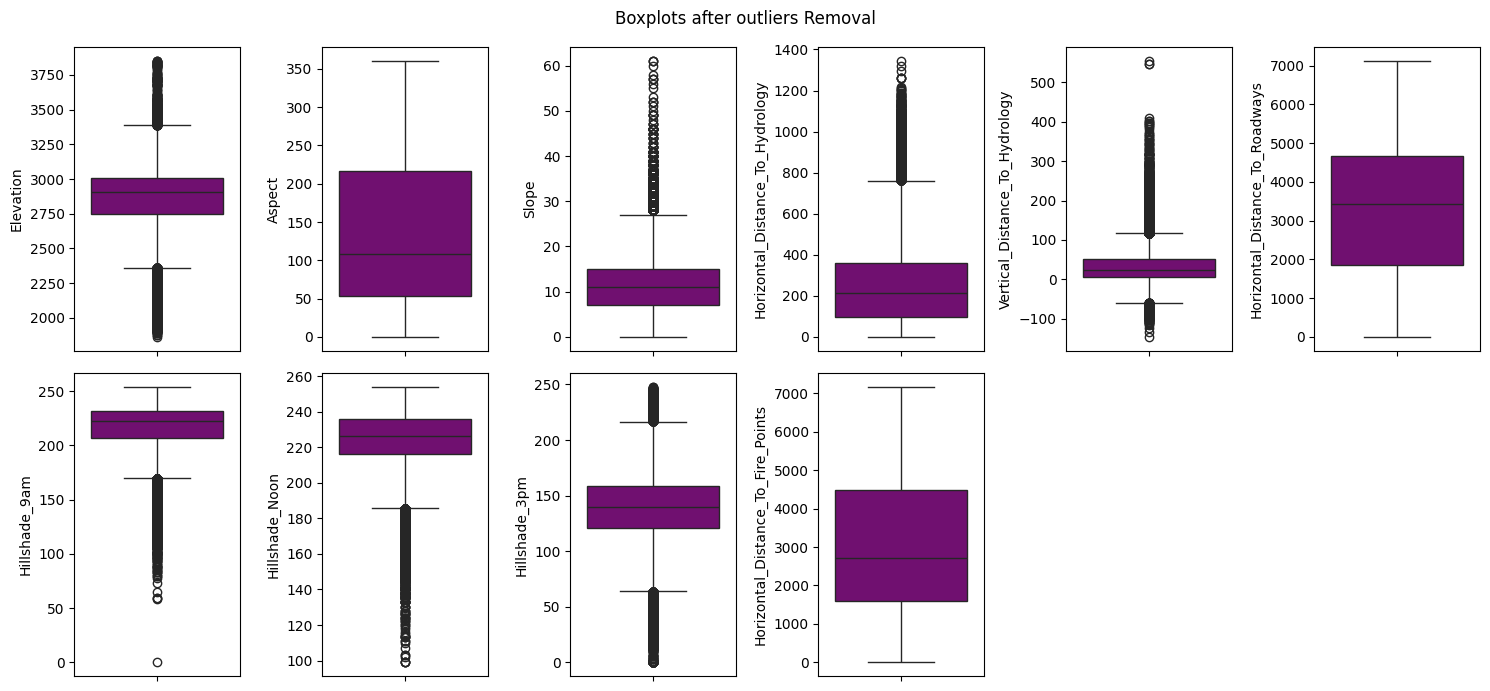

In [75]:
numerical_cols = ['Elevation',
'Aspect',
'Slope',
'Horizontal_Distance_To_Hydrology',
'Vertical_Distance_To_Hydrology',
'Horizontal_Distance_To_Roadways',
'Hillshade_9am',
'Hillshade_Noon',
'Hillshade_3pm',
'Horizontal_Distance_To_Fire_Points']

plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots after outliers Removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(2, 6, i+1)
    sns.boxplot(y=data[numerical_cols[i]],color='purple')
    plt.tight_layout()


In [76]:
for col in numerical_cols:

    Q1 = data[col].quantile(0.25)  # 25%th percentile
    Q3 = data[col].quantile(0.75)  # 75%th percentile
    IQR = Q3 - Q1 

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

In [77]:
Q1 = data['Elevation'].quantile(0.25)  # 25%th percentile
Q3 = data['Elevation'].quantile(0.75)  # 75%th percentile
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Upper Bound:",upper_bound)
print("Lower Bound:",lower_bound)

Upper Bound: 3389.5
Lower Bound: 2361.5


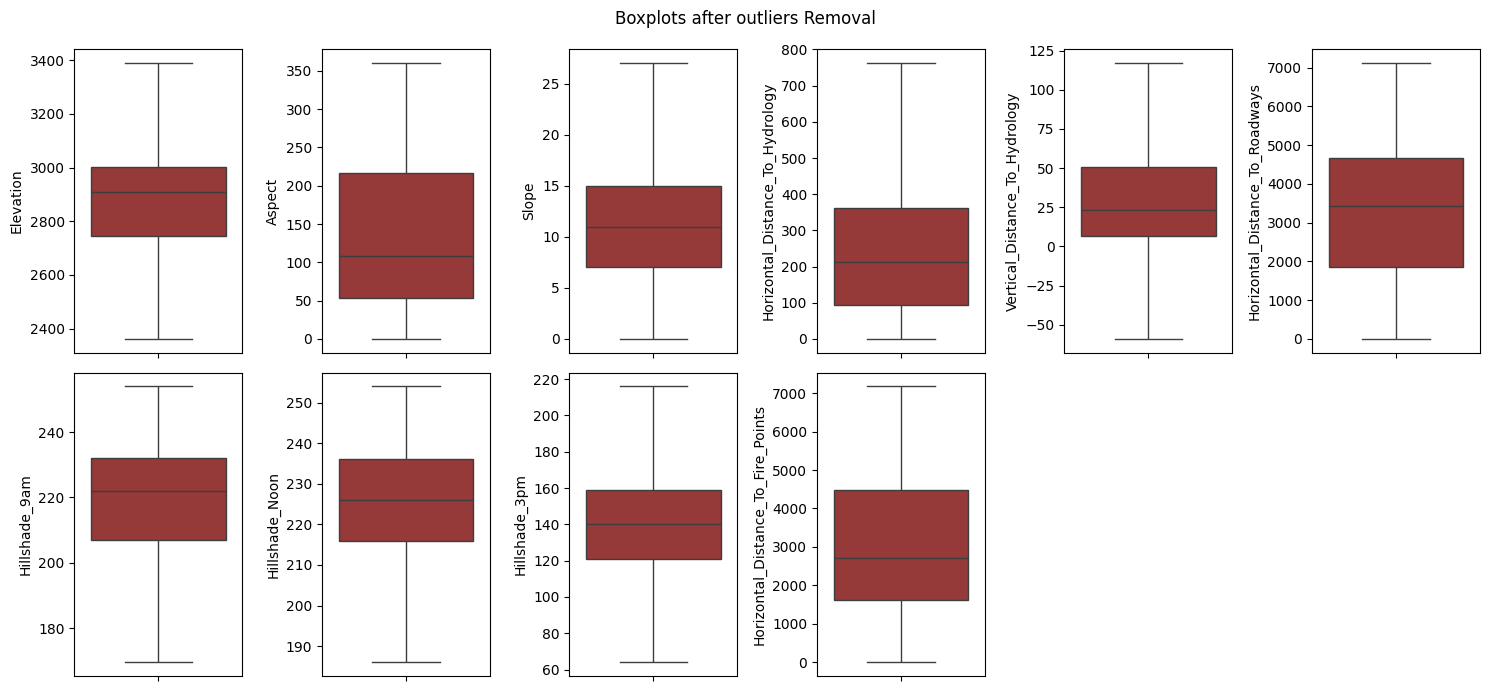

In [78]:
plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots after outliers Removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(2, 6, i+1)
    sns.boxplot(y=data[numerical_cols[i]],color='brown')
    plt.tight_layout()

In [79]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


## Skewness

In [80]:
skewness = data[numerical_cols].skew()
skewness

Elevation                            -0.340370
Aspect                                0.689432
Slope                                 0.621361
Horizontal_Distance_To_Hydrology      0.792349
Vertical_Distance_To_Hydrology        0.861265
Horizontal_Distance_To_Roadways      -0.058240
Hillshade_9am                        -0.740409
Hillshade_Noon                       -0.505363
Hillshade_3pm                        -0.001189
Horizontal_Distance_To_Fire_Points    0.365249
dtype: float64

In [81]:
skewed_cols= skewness[skewness>0.7].index
skewed_cols

Index(['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], dtype='object')

In [82]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
3,2785.0,155.0,18.0,242.0,117.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen


## Feature Engineering

In [83]:
data['Distance_To_Hydrology']= np.sqrt(data['Horizontal_Distance_To_Hydrology']**2+ data['Vertical_Distance_To_Hydrology']**2)
data['Water_Elevation']= data['Elevation']-data['Vertical_Distance_To_Hydrology']
data['Area_Steepness'] = data['Slope'] / (data['Elevation'] + 1e-5)
data["Hillshade_Avg"]= (data["Hillshade_9am"] + data["Hillshade_Noon"] + data["Hillshade_3pm"]) / 3

In [84]:
data['Wilderness']=data[[w for w in data.columns if "Wilderness" in w]].idxmax(axis=1)
data['Soil_Type']=data[[s for s in data.columns if "Soil_Type" in s]].idxmax(axis=1)

In [85]:
data=data.drop(columns=[w for w in data.columns if "Wilderness_" in w])
data=data.drop(columns=[s for s in data.columns if "Soil_Type_" in s])

In [86]:
# Target Encoding
target_encoder=LabelEncoder()
data['Cover_Type']=target_encoder.fit_transform(data['Cover_Type'])
with open('target_encoder.pkl', 'wb') as f:
    pickle.dump(target_encoder, f)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 17 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           145890 non-null  float64
 1   Aspect                              145890 non-null  float64
 2   Slope                               145890 non-null  float64
 3   Horizontal_Distance_To_Hydrology    145890 non-null  float64
 4   Vertical_Distance_To_Hydrology      145890 non-null  float64
 5   Horizontal_Distance_To_Roadways     145890 non-null  float64
 6   Hillshade_9am                       145890 non-null  float64
 7   Hillshade_Noon                      145890 non-null  float64
 8   Hillshade_3pm                       145890 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  float64
 10  Cover_Type                          145890 non-null  int64  
 11  Distance_To_Hydrology     

## Data split

In [88]:
X= data.drop(columns=['Cover_Type','Hillshade_9am','Hillshade_Noon','Hillshade_3pm'])
#Y= resampled_df['Cover_Type']
Y= data['Cover_Type']

In [89]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Distance_To_Hydrology,Water_Elevation,Area_Steepness,Hillshade_Avg,Wilderness,Soil_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,6279.0,258.000000,2596.0,0.001156,200.333333,Wilderness_Area_1,Soil_Type_29
1,2590.0,56.0,2.0,212.0,-6.0,390.0,6225.0,212.084889,2596.0,0.000772,202.000000,Wilderness_Area_1,Soil_Type_29
2,2804.0,139.0,9.0,268.0,65.0,3180.0,6121.0,275.769832,2739.0,0.003210,202.333333,Wilderness_Area_1,Soil_Type_12
3,2785.0,155.0,18.0,242.0,117.0,3090.0,6211.0,268.799182,2668.0,0.006463,199.333333,Wilderness_Area_1,Soil_Type_30
4,2595.0,45.0,2.0,153.0,-1.0,391.0,6172.0,153.003268,2596.0,0.000771,201.333333,Wilderness_Area_1,Soil_Type_29


In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           145890 non-null  float64
 1   Aspect                              145890 non-null  float64
 2   Slope                               145890 non-null  float64
 3   Horizontal_Distance_To_Hydrology    145890 non-null  float64
 4   Vertical_Distance_To_Hydrology      145890 non-null  float64
 5   Horizontal_Distance_To_Roadways     145890 non-null  float64
 6   Horizontal_Distance_To_Fire_Points  145890 non-null  float64
 7   Distance_To_Hydrology               145890 non-null  float64
 8   Water_Elevation                     145890 non-null  float64
 9   Area_Steepness                      145890 non-null  float64
 10  Hillshade_Avg                       145890 non-null  float64
 11  Wilderness                

In [91]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)

In [92]:
x_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Distance_To_Hydrology,Water_Elevation,Area_Steepness,Hillshade_Avg,Wilderness,Soil_Type
48006,2995.0,152.0,10.0,600.0,86.0,5567.0,4056.0,606.131999,2909.0,0.003339,203.333333,Wilderness_Area_1,Soil_Type_29
12365,2361.5,297.0,27.0,201.0,117.0,1410.0,674.0,232.572569,2244.5,0.011433,199.833333,Wilderness_Area_4,Soil_Type_10
125041,2898.0,103.0,8.0,175.0,43.0,2866.0,2239.0,180.205438,2855.0,0.002761,197.666667,Wilderness_Area_1,Soil_Type_30
124283,2949.0,125.0,14.0,268.0,53.0,3384.0,1684.0,273.190410,2896.0,0.004747,195.000000,Wilderness_Area_1,Soil_Type_29
70536,2845.0,142.0,16.0,67.0,10.0,2893.0,2971.0,67.742158,2835.0,0.005624,197.666667,Wilderness_Area_1,Soil_Type_30


In [93]:
x_test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Distance_To_Hydrology,Water_Elevation,Area_Steepness,Hillshade_Avg,Wilderness,Soil_Type
60484,3185.0,135.0,1.0,450.0,10.0,3861.0,4294.0,450.111097,3175.0,0.000314,204.000000,Wilderness_Area_1,Soil_Type_29
18917,2850.0,4.0,18.0,134.0,36.0,4261.0,5087.0,138.751577,2814.0,0.006316,179.000000,Wilderness_Area_1,Soil_Type_29
103094,2622.0,153.0,7.0,331.0,0.0,457.0,1387.0,331.000000,2622.0,0.002670,204.666667,Wilderness_Area_1,Soil_Type_12
101453,2962.0,67.0,8.0,339.0,7.0,4523.0,3398.0,339.072264,2955.0,0.002701,193.666667,Wilderness_Area_1,Soil_Type_29
44081,2919.0,300.0,8.0,162.0,33.0,6292.0,4548.0,165.326949,2886.0,0.002741,204.666667,Wilderness_Area_1,Soil_Type_24


## SMOTE

In [94]:
y_train.value_counts()

Cover_Type
4    82457
6    24888
0     2455
1     1728
5     1728
3     1728
2     1728
Name: count, dtype: int64

In [95]:
categorical_cols=['Wilderness','Soil_Type']
categorical_indices=[x_train.columns.get_loc(col) for col in categorical_cols]

smote=SMOTENC(categorical_features=categorical_indices,random_state=42)
x_res_train,y_res_train=smote.fit_resample(x_train,y_train)

In [97]:
x_res_train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Distance_To_Hydrology,Water_Elevation,Area_Steepness,Hillshade_Avg,Wilderness,Soil_Type
0,2995.000000,152.000000,10.000000,600.000000,86.000000,5567.000000,4056.000000,606.131999,2909.000000,0.003339,203.333333,Wilderness_Area_1,Soil_Type_29
1,2361.500000,297.000000,27.000000,201.000000,117.000000,1410.000000,674.000000,232.572569,2244.500000,0.011433,199.833333,Wilderness_Area_4,Soil_Type_10
2,2898.000000,103.000000,8.000000,175.000000,43.000000,2866.000000,2239.000000,180.205438,2855.000000,0.002761,197.666667,Wilderness_Area_1,Soil_Type_30
3,2949.000000,125.000000,14.000000,268.000000,53.000000,3384.000000,1684.000000,273.190410,2896.000000,0.004747,195.000000,Wilderness_Area_1,Soil_Type_29
4,2845.000000,142.000000,16.000000,67.000000,10.000000,2893.000000,2971.000000,67.742158,2835.000000,0.005624,197.666667,Wilderness_Area_1,Soil_Type_30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
577194,2993.295003,174.544008,7.363998,117.954003,5.806502,5410.727996,2004.649490,118.123216,2987.488501,0.002461,206.473168,Wilderness_Area_1,Soil_Type_23
577195,3092.858341,296.841563,11.141659,60.000000,10.991611,3212.708294,5172.524690,61.044961,3081.866730,0.003602,204.241691,Wilderness_Area_1,Soil_Type_29
577196,3236.897871,52.404247,10.034043,255.374473,22.897871,3849.340430,3263.523398,256.400878,3214.000000,0.003100,190.615602,Wilderness_Area_1,Soil_Type_40
577197,3121.572031,40.586633,10.793316,326.081439,116.841337,4881.663857,2262.572031,346.401282,3004.730694,0.003458,187.958252,Wilderness_Area_1,Soil_Type_29


In [98]:
y_res_train.value_counts()

Cover_Type
4    82457
5    82457
1    82457
6    82457
3    82457
0    82457
2    82457
Name: count, dtype: int64

## Encoding

In [99]:
wilderness_encoder=LabelEncoder()
soil_encoder=LabelEncoder()

x_res_train['Wilderness']=wilderness_encoder.fit_transform(x_res_train['Wilderness'])
x_test['Wilderness']=wilderness_encoder.transform(x_test['Wilderness'])

with open('wilderness_encoder.pkl', 'wb') as f:
    pickle.dump(wilderness_encoder, f)

x_res_train['Soil_Type']=soil_encoder.fit_transform(x_res_train['Soil_Type'])
x_test['Soil_Type']=soil_encoder.transform(x_test['Soil_Type'])

with open('soil_encoder.pkl', 'wb') as f:
    pickle.dump(soil_encoder, f)

In [108]:
x_test[['Soil_Type','Wilderness']].head()

,Soil_Type,Wilderness
60484,20,0
18917,20,0
103094,3,0
101453,20,0
44081,15,0


## Feature Selection

In [109]:
x_res_train[x_res_train.duplicated(keep=False)].any()

Elevation                             False
Aspect                                False
Slope                                 False
Horizontal_Distance_To_Hydrology      False
Vertical_Distance_To_Hydrology        False
Horizontal_Distance_To_Roadways       False
Horizontal_Distance_To_Fire_Points    False
Distance_To_Hydrology                 False
Water_Elevation                       False
Area_Steepness                        False
Hillshade_Avg                         False
Wilderness                            False
Soil_Type                             False
dtype: bool

In [110]:
x=x_res_train
y=y_res_train

RF_model=RandomForestClassifier(n_estimators=200,random_state=42)
RF_model.fit(x,y)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [111]:
important_cols=pd.DataFrame({
    'features':x.columns,
    'importance':RF_model.feature_importances_
})
important_cols=important_cols.sort_values('importance', ascending= False)
important_cols

,features,importance
8,Water_Elevation,0.182798
0,Elevation,0.169443
5,Horizontal_Distance_To_Roadways,0.116841
12,Soil_Type,0.105061
6,Horizontal_Distance_To_Fire_Points,0.104492
11,Wilderness,0.088011
1,Aspect,0.047242
3,Horizontal_Distance_To_Hydrology,0.044077
7,Distance_To_Hydrology,0.040970
4,Vertical_Distance_To_Hydrology,0.029906


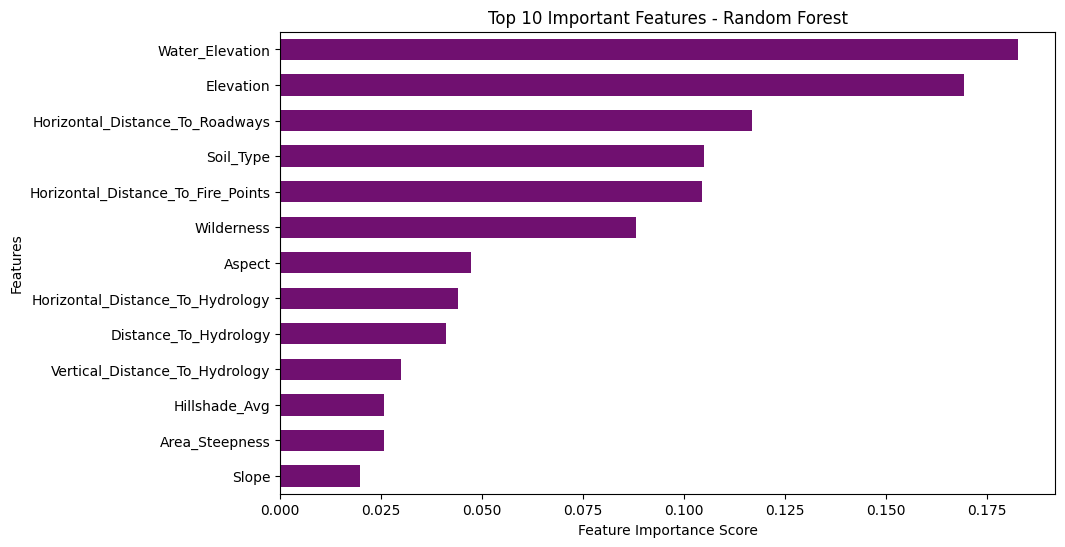

In [112]:
plt.figure(figsize=(10,6))
sns.barplot(x=important_cols['importance'][:20], y=important_cols['features'][:20], color='purple', width=0.6)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features - Random Forest")
plt.show()


## Model Building

In [44]:
models=[DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), XGBClassifier(n_estimators= 200, eval_metric='logloss')]

for model in models:
    model.fit(x_res_train,y_res_train)

    y_pred=model.predict(x_test)

    accuracy= accuracy_score(y_pred,y_test)
    confusion= confusion_matrix(y_pred,y_test)
    classification= classification_report(y_pred,y_test)
    print(str(model),'Accuracy:', accuracy)
    print(str(model),'confusion_matrix:\n',confusion)
    print(str(model),'classification_report:\n',classification)

DecisionTreeClassifier() Accuracy: 0.9454383439577764
DecisionTreeClassifier() confusion_matrix:
 [[  540     0     5     0    85     6    22]
 [    0   390    13     0     0    16     0]
 [    6    10   339     0    17    60     2]
 [    0     0     0   411     5     0    39]
 [   56     0     5     3 19879     5   477]
 [    7    32    68     0     9   345     0]
 [    5     0     2    18   619     0  5682]]
DecisionTreeClassifier() classification_report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       658
           1       0.90      0.93      0.92       419
           2       0.78      0.78      0.78       434
           3       0.95      0.90      0.93       455
           4       0.96      0.97      0.97     20425
           5       0.80      0.75      0.77       461
           6       0.91      0.90      0.91      6326

    accuracy                           0.95     29178
   macro avg       0.88      0.87      0.87     2

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline= Pipeline([
    ('scaler',StandardScaler()),
    ('logreg',LogisticRegression(max_iter=1000,solver='saga', C=0.5))
])

pipeline.fit(x_res_train,y_res_train)
y_pred=pipeline.predict(x_test)
accuracy= accuracy_score(y_pred,y_test)
confusion= confusion_matrix(y_pred,y_test)
classification= classification_report(y_pred,y_test)

print(f"LogisticRegression Accuracy: {accuracy}")
print(f"LogisticRegression confusion_matrix:\n{confusion}")
print(f"LogisticRegression classification_report:\n{classification}")

LogisticRegression Accuracy: 0.636404140105559
LogisticRegression confusion_matrix:
[[  432     0    13     4  3077    17   273]
 [    0   368    56     0     0    67     0]
 [   13    20   257     0    20   112     5]
 [    0     0     0   422    30     0   183]
 [  139     0     0     0 12852     0  1759]
 [   17    44   106     0     5   236     0]
 [   13     0     0     6  4630     0  4002]]
LogisticRegression classification_report:
              precision    recall  f1-score   support

           0       0.70      0.11      0.20      3816
           1       0.85      0.75      0.80       491
           2       0.59      0.60      0.60       427
           3       0.98      0.66      0.79       635
           4       0.62      0.87      0.73     14750
           5       0.55      0.58      0.56       408
           6       0.64      0.46      0.54      8651

    accuracy                           0.64     29178
   macro avg       0.71      0.58      0.60     29178
weighted avg    

## Cross Validation

In [699]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf= StratifiedKFold(n_splits=5, shuffle= True, random_state=42)
for model in models:
    cv=cross_val_score(model,x_res_train,y_res_train,cv=skf,scoring='accuracy')
    avg=cv.mean()
    std=cv.std()
    print(f"{model}:AVG= {avg},STD= {std}")

DecisionTreeClassifier():AVG= 0.9854365642027091,STD= 0.0004121902202498075
RandomForestClassifier():AVG= 0.9931323513811451,STD= 0.0001087941491815155
KNeighborsClassifier():AVG= 0.9902459986322242,STD= 0.00031958988677314006
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None,

In [700]:
#pipeline= Pipeline([
#    ('scaler',StandardScaler()),
#    ('logreg',LogisticRegression(max_iter=1000,solver='saga', C=0.5, class_weight='balanced'))
#])
cv=cross_val_score(pipeline,x_res_train,y_res_train,cv=skf,scoring='accuracy')
avg=cv.mean()
std=cv.std()
print(f"LogisticRegression:AVG= {avg},STD= {std}")

LogisticRegression:AVG= 0.7083640164539384,STD= 0.0013121217590146166


## Hyperparameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

subset_size = 200000  
X_sub = x_res_train.sample(n=subset_size, random_state=42)
y_sub = y_res_train.loc[X_sub.index]

rf_para_grid={
    'n_estimators':[100,200,300],
    'max_depth':[10,20,30,None],
    'min_samples_split':[5,10],
    'min_samples_leaf':[2,4,6],
    'max_features':['sqrt','log2'],
    'bootstrap':[True]
}

grid= RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_para_grid, n_iter=30, cv=4, scoring='accuracy', n_jobs=-1, verbose=1,random_state=42, return_train_score=True)
grid.fit(x_res_train,y_res_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True], 'max_depth': [10, 20, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [2, 4, ...], ...}"
,n_iter,30
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [113]:
random=grid
best_model=random.best_estimator_

In [114]:
print(f"best parameter=",random.best_params_)
print(f"best accuracy=",random.best_score_)

best parameter= {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
best accuracy= 0.9919819707680676


In [115]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)